In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
advertising_data = pd.read_csv("datasets/advertising_oversampling.csv")

advertising_data.head(5)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,0,Nauru,2016-04-04 01:39:02,1
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,1
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,0,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [38]:
advertising_data.shape

(1000, 10)

### Observe that a large number of records here are for people who did not click on the ad

This is a highly skewed dataset

Class 0: 805
Class 1: 195
Proportion: 4.0 2 : 1


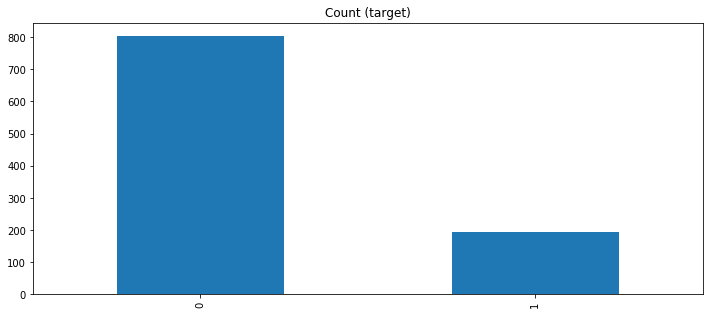

In [40]:
clicked_on_ad_count = advertising_data["Clicked on Ad"].value_counts()

print("Class 0:", clicked_on_ad_count[0])
print("Class 1:", clicked_on_ad_count[1])
print("Proportion:",round( clicked_on_ad_count[0] / clicked_on_ad_count[1]), 2, ": 1")

clicked_on_ad_count.plot(kind = "bar", title = "Count (target)", figsize = (12, 5))

### We'll choose a few columns which we think are relevant and perform classification on this dataset

In [41]:
numeric_columns = advertising_data[["Daily Time Spent on Site", "Age", "Area Income",
                                    "Daily Internet Usage", "Male", "Clicked on Ad"]]

In [42]:
y = numeric_columns["Clicked on Ad"]
x = numeric_columns.drop("Clicked on Ad", axis = 1)

In [43]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size = 0.25,
                                                    random_state = 27)

In [44]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(max_iter=500)

In [45]:
logistic_model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
y_pred = logistic_model.predict(x_test)

In [47]:
pd.crosstab(y_pred, y_test)

Clicked on Ad,0,1
row_0,,
0,203,47


In [48]:
from sklearn import metrics

### When working with a skewed dataset, the accuracy may be good

But accuracy is probably not the right metric to evaluate this model

In [49]:
metrics.accuracy_score(y_test, y_pred)

0.812

In [50]:
metrics.precision_score(y_test, y_pred)

/Users/jananiravi/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

In [51]:
metrics.recall_score(y_test, y_pred)

0.0

### Recreate the original data frame with the numeric features

In [52]:
x = pd.concat([x_train, y_train], axis = 1)

x = x.reset_index(drop = True)

In [53]:
clicked_on_ad = numeric_columns[numeric_columns["Clicked on Ad"] == 1]

not_clicked_on_ad = numeric_columns[numeric_columns["Clicked on Ad"] == 0]

In [54]:
from sklearn.utils import resample

In [55]:
over_sampled = resample(clicked_on_ad,
                        replace = True,
                        n_samples = len(not_clicked_on_ad),
                        random_state = 27)

In [56]:
over_sampled = pd.concat([not_clicked_on_ad, over_sampled])

over_sampled = over_sampled.reset_index(drop = True)

In [57]:
over_sampled.sample(5)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
1154,81.67,28,62927.96,196.76,0,1
662,78.51,25,59106.12,205.71,0,0
1268,40.42,45,40183.75,133.90,0,1
319,81.51,41,53412.32,250.03,0,0
1231,44.33,37,52723.34,123.72,0,1


In [58]:
clicked_on_ad_count = over_sampled["Clicked on Ad"].value_counts()

clicked_on_ad_count

1    805
0    805
Name: Clicked on Ad, dtype: int64

Class 0: 805
Class 1: 805
Proportion: 1.0 2 : 1


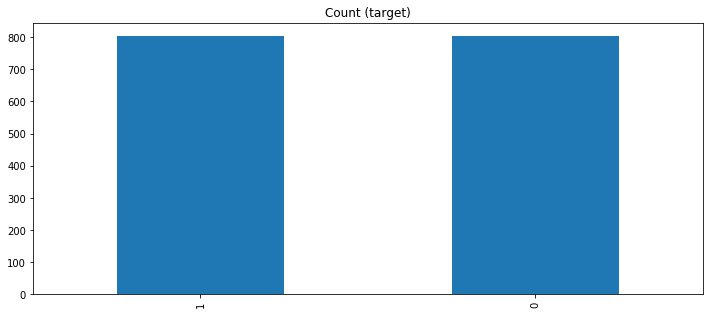

In [59]:
print("Class 0:", clicked_on_ad_count[0])
print("Class 1:", clicked_on_ad_count[1])
print("Proportion:",round( clicked_on_ad_count[0] / clicked_on_ad_count[1]), 2, ": 1")

clicked_on_ad_count.plot(kind = "bar", title = "Count (target)", figsize = (12, 5))

In [60]:
y_train = over_sampled["Clicked on Ad"]

x_train = over_sampled.drop("Clicked on Ad", axis =1)

In [61]:
logistic_model = LogisticRegression(solver = "liblinear")

logistic_model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [62]:
y_pred = logistic_model.predict(x_test)

pd.crosstab(y_pred, y_test)

Clicked on Ad,0,1
row_0,,
0,115,26
1,88,21


In [63]:
metrics.accuracy_score(y_test, y_pred)

0.544

In [64]:
metrics.precision_score(y_test, y_pred)

0.1926605504587156

In [65]:
metrics.recall_score(y_test, y_pred)

0.44680851063829785

In [66]:
under_sampled = resample(not_clicked_on_ad,
                         replace = True,
                         n_samples = len(clicked_on_ad),
                         random_state = 27)

In [67]:
under_sampled = pd.concat([clicked_on_ad, under_sampled])

under_sampled = under_sampled.reset_index(drop = True)

under_sampled.sample(5)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
232,72.46,40,56683.32,113.53,0,0
384,67.71,25,63430.33,225.76,0,0
141,61.22,45,63883.81,119.03,0,1
196,54.39,20,52563.22,171.90,0,0
57,86.06,31,53767.12,219.72,0,1


In [68]:
clicked_on_ad_count = under_sampled["Clicked on Ad"].value_counts()

clicked_on_ad_count

1    195
0    195
Name: Clicked on Ad, dtype: int64

Class 0: 195
Class 1: 195
Proportion: 1.0 2 : 1


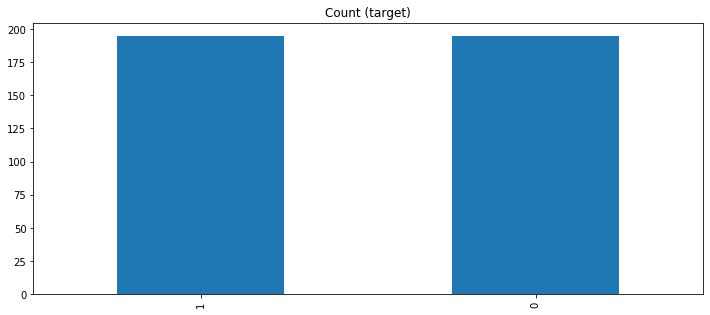

In [70]:
print("Class 0:", clicked_on_ad_count[0])
print("Class 1:", clicked_on_ad_count[1])
print("Proportion:",round( clicked_on_ad_count[0] / clicked_on_ad_count[1]), 2, ": 1")

clicked_on_ad_count.plot(kind = "bar", title = "Count (target)", figsize = (12, 5))

In [71]:
y_train = under_sampled["Clicked on Ad"]

x_train = under_sampled.drop("Clicked on Ad", axis =1)

In [72]:
logistic_model = LogisticRegression(solver = "liblinear")

logistic_model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [73]:
y_pred = logistic_model.predict(x_test)

pd.crosstab(y_pred, y_test)

Clicked on Ad,0,1
row_0,,
0,113,23
1,90,24


In [74]:
metrics.accuracy_score(y_test, y_pred)

0.548

In [75]:
metrics.precision_score(y_test, y_pred)

0.21052631578947367

In [76]:
metrics.recall_score(y_test, y_pred)

0.5106382978723404